In [21]:
import yfinance as yf
import pandas as pd 
import numpy as np

In [22]:
sp500 = yf.Ticker("^GSPC")

In [23]:
sp500 = sp500.history(period="max")

In [24]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-01-16 00:00:00-05:00', '2024-01-17 00:00:00-05:00',
               '2024-01-18 00:00:00-05:00', '2024-01-19 00:00:00-05:00',
               '2024-01-22 00:00:00-05:00', '2024-01-23 00:00:00-05:00',
               '2024-01-24 00:00:00-05:00', '2024-01-25 00:00:00-05:00',
               '2024-01-26 00:00:00-05:00', '2024-01-29 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24134, freq=None)

<Axes: xlabel='Date'>

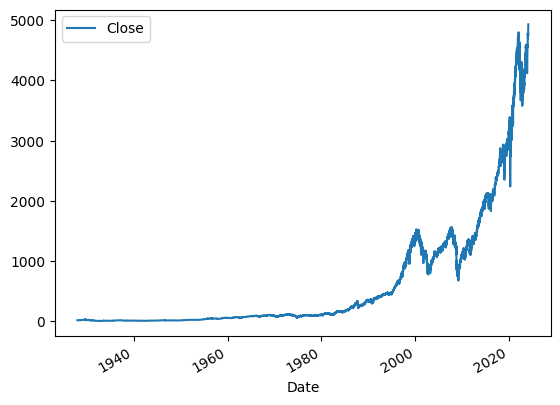

In [25]:
sp500.plot.line(y="Close",use_index = True)

In [26]:
del sp500['Dividends']
del sp500['Stock Splits']

In [27]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [28]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-01-23 00:00:00-05:00,4856.799805,4866.479980,4844.370117,4864.600098,3912800000,4868.549805
2024-01-24 00:00:00-05:00,4888.560059,4903.680176,4865.939941,4868.549805,4330030000,4894.160156
2024-01-25 00:00:00-05:00,4886.660156,4898.149902,4869.339844,4894.160156,4020430000,4890.970215


In [29]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [30]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-01-23 00:00:00-05:00,4856.799805,4866.479980,4844.370117,4864.600098,3912800000,4868.549805,1
2024-01-24 00:00:00-05:00,4888.560059,4903.680176,4865.939941,4868.549805,4330030000,4894.160156,1
2024-01-25 00:00:00-05:00,4886.660156,4898.149902,4869.339844,4894.160156,4020430000,4890.970215,0


In [31]:
sp500 = sp500.loc["1990-01-01":].copy()

In [32]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-01-23 00:00:00-05:00,4856.799805,4866.479980,4844.370117,4864.600098,3912800000,4868.549805,1
2024-01-24 00:00:00-05:00,4888.560059,4903.680176,4865.939941,4868.549805,4330030000,4894.160156,1
2024-01-25 00:00:00-05:00,4886.660156,4898.149902,4869.339844,4894.160156,4020430000,4890.970215,0


In [33]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, min_samples_split=100, random_state = 1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [34]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [35]:
preds = pd.Series(preds, index = test.index)

In [36]:
preds

Date
2023-09-06 00:00:00-04:00    1
2023-09-07 00:00:00-04:00    1
2023-09-08 00:00:00-04:00    0
2023-09-11 00:00:00-04:00    1
2023-09-12 00:00:00-04:00    1
                            ..
2024-01-23 00:00:00-05:00    0
2024-01-24 00:00:00-05:00    0
2024-01-25 00:00:00-05:00    0
2024-01-26 00:00:00-05:00    0
2024-01-29 00:00:00-05:00    0
Length: 100, dtype: int32

In [38]:
precision_score(test["Target"], preds)

0.5454545454545454

In [39]:
combined = pd.concat([test["Target"], preds], axis = 1)

<Axes: xlabel='Date'>

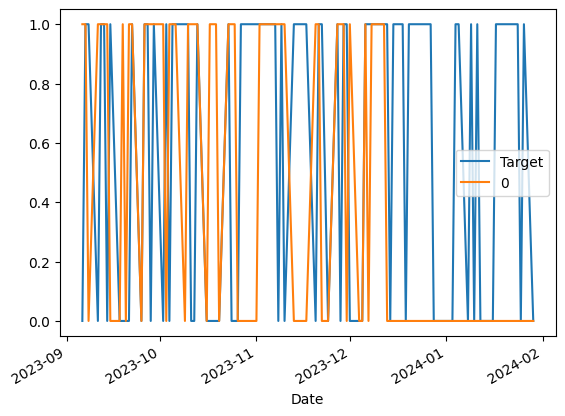

In [40]:
combined.plot()

In [41]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index = test.index, name = "Predictions")
  combined = pd.concat([test["Target"], preds], axis = 1)
  return combined

In [42]:
def backtest(data, model, predictors, start=2500, step=250):
  all_predictions = []

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train,test,predictors,model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

In [43]:
predictions = backtest(sp500, model, predictors)

In [44]:
predictions["Predictions"].value_counts()

Predictions
0    3488
1    2596
Name: count, dtype: int64

In [45]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5288906009244992

In [47]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.534681
0    0.465319
Name: count, dtype: float64